In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def Vpot(x):
    return (x**2 - 2.5)*x**2

In [30]:
def get_best_parameters(filename):
    last_line = None
    with open(filename, 'r') as f:
        for line in f:
            stripped = line.strip()
            if stripped:
                last_line = stripped

    parts = last_line.split()

    second = parts[2]
    third = parts[3]
    return float(second), float(third)

In [5]:
def psi_2(x, mu, sigma):
    K = 1/(2*((np.pi)**0.5)*sigma*(1+np.exp(-(mu/sigma)**2)))
    return K*(np.exp(-pow(x-mu,2)/(2*sigma*sigma)) + np.exp(-pow(x+mu,2)/(2*sigma*sigma)))**2

In [6]:
def plot_best_analitic_distribution(best_mu, best_sigma):
    x = np.linspace(-3, 3, 400)
    y = psi_2(x, best_mu, best_sigma)
    plt.plot(x, y, label='Metodo SA', color='red')

In [7]:
def plot_best_distribution(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            data.append(float(line))
    plt.hist(data, bins=50, density=True, alpha=0.7, edgecolor='black')

In [33]:
def plot_matrix_method():
    hbar = 1
    m = 1
    a = 10
    N = 1000 # number of iterations
    # Step sizes
    x = np.linspace(-a/2, a/2, N)
    dx = x[1] - x[0] # the step size
    V = Vpot(x)
    # The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

    CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
    # np.diag(np.array,k) construct a "diagonal" matrix using the np.array
    # The default is k=0. Use k>0 for diagonals above the main diagonal, 
    # and k<0 for diagonals below the main diagonal

    # Hamiltonian matrix
    H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

    # Compute eigenvectors and their eigenvalues
    E,psi = np.linalg.eigh(H)

    # Take the transpose & normalize
    psi = np.transpose(psi)
    psi = psi/np.sqrt(dx)
    scale = 0.3
    plt.plot(x, scale*V, color="Black", label = 'Potenziale') # plot the potential
    plt.plot(x,(psi[0])**2, color = "orange", label = 'Metodo matriciale')

In [9]:
def set_apperance():
    plt.title("Matrix vs SA")
    plt.xlabel("x")
    plt.ylabel("Probabilità")
    plt.grid(True)
    plt.legend()
    plt.xlim((-3,3))
    plt.ylim((-0.6,0.6))
    plt.show()

---

# Esercizio 8.1

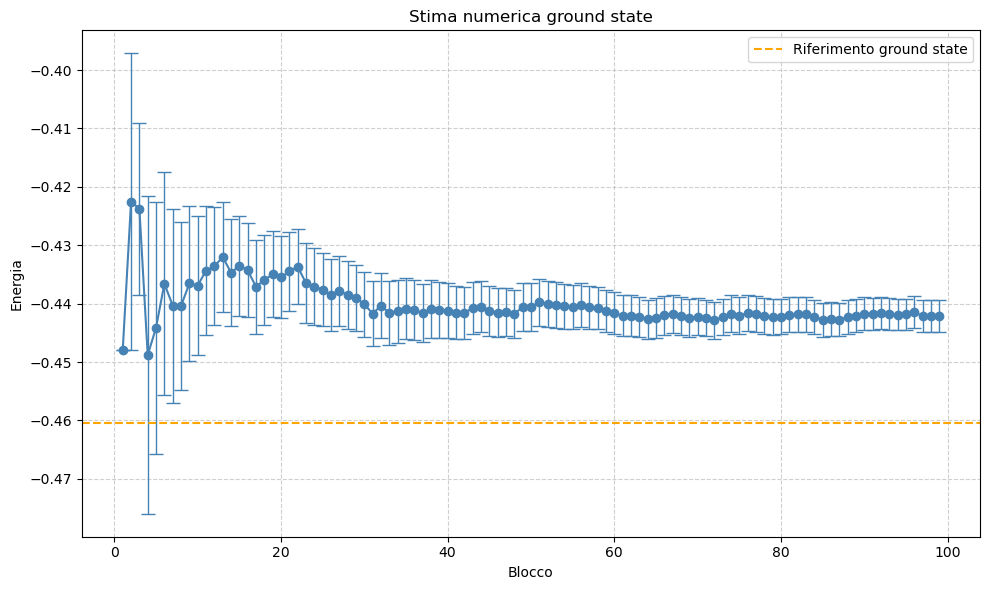

In [29]:
nome_file = 'OUTPUT/results_integral_metropolis.dat'
valori_y = []
errori_y = []
valori_x = []
inizia_lettura = False
with open(nome_file, 'r') as file:
    for riga in file:
        riga = riga.strip()
        if riga == "###":
            inizia_lettura = True
            continue  # Salta la riga con ###
        if not inizia_lettura or riga == "":
            continue  # Salta righe prima di ### o vuote
        try:
            y, err_y, x = map(float, riga.split())
            valori_y.append(y)
            errori_y.append(err_y)
            valori_x.append(x)
        except ValueError:
            print(f"Riga non valida: {riga}")
plt.figure(figsize=(10, 6))
plt.errorbar(valori_x, valori_y, yerr=errori_y, fmt='o-', capsize=5, color='steelblue', elinewidth=1)
plt.xlabel('Blocco')
plt.ylabel('Energia')
plt.title('Stima numerica ground state')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=-0.4604658796927157, color='orange', linestyle='--', label='Riferimento ground state')
plt.tight_layout()
plt.legend()
plt.show()

---

# Esercizio 8.2

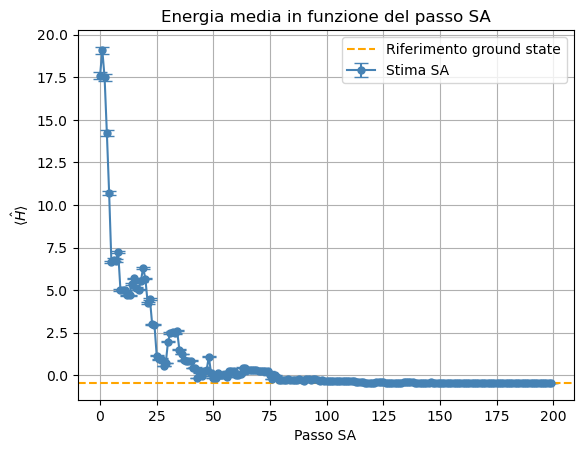

In [23]:
nome_file = 'OUTPUT/sa_data.dat'

# 1) Leggi tutte le righe in memoria
with open(nome_file, 'r') as file:
    all_lines = file.readlines()

# 2) Ignora le ultime due righe
lines_to_process = all_lines[:-2]

x = []
y = []
yerr = []

# 3) Processo solo le righe selezionate
for riga in lines_to_process:
    valori = riga.strip().split()
    if len(valori) >= 3:
        try:
            # Prende solo i primi tre valori come float
            x_val, y_val, err_val = map(float, valori[:3])
            x.append(x_val)
            y.append(y_val)
            yerr.append(err_val)
        except ValueError:
            print(f"Riga ignorata per errore di conversione: {riga.strip()}")

# 4) Plot con barre d’errore
plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=5,
             color='steelblue', ecolor='steelblue', markersize=5,
             label='Stima SA')
plt.xlabel('Passo SA')
plt.ylabel(r'$\langle \hat H \rangle$')
plt.title('Energia media in funzione del passo SA')
plt.axhline(y=-0.4604658796927157, color='orange',
            linestyle='--', label='Riferimento ground state')
plt.grid(True)
plt.legend()
plt.show()


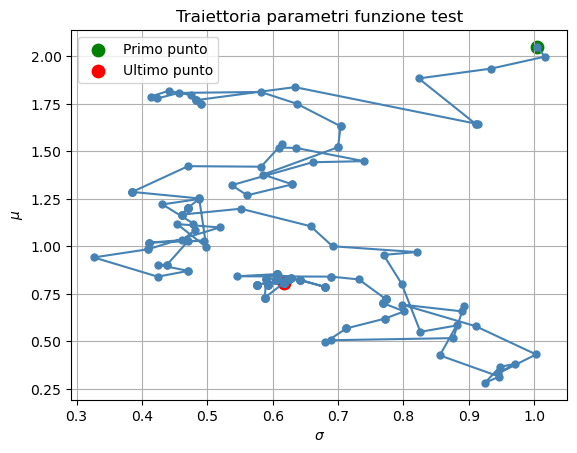

In [22]:
nome_file = "OUTPUT/sa_data.dat"
x = []
y = []

with open(nome_file, 'r') as file:
    for riga in file:
        valori = riga.strip().split()
        if len(valori) >= 5:
            try:
                # Estrae solo il 4° e 5° valore (indice 3 e 4)
                x_val = float(valori[3])
                y_val = float(valori[4])
                x.append(x_val)
                y.append(y_val)
            except ValueError:
                print(f"Riga ignorata per errore di conversione: {riga.strip()}")

plt.plot(x, y, marker='o', linestyle='-', color='steelblue', markersize = 5)
# Primo punto (rosso)
plt.scatter(x[0], y[0], color='green', s=80, label='Primo punto')
# Ultimo punto (verde)
plt.scatter(x[-1], y[-1], color='red', s=80, label='Ultimo punto')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\mu$')
plt.title('Traiettoria parametri funzione test')
plt.legend()
plt.grid(True)
plt.show()

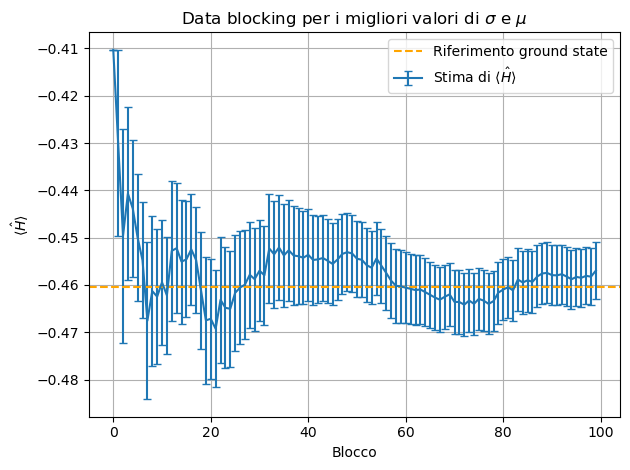

In [21]:
x, y, yerr = [], [], []
filename = 'OUTPUT/best_blocking.dat'

with open(filename, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) != 3:
            continue
        xi, yi, ei = map(float, parts)
        x.append(xi)
        y.append(yi)
        yerr.append(ei)

plt.figure()
plt.errorbar(x, y, yerr=yerr, capsize=3, label = 'Stima di 'r'$\langle \hat H \rangle$')
plt.xlabel('Blocco')
plt.ylabel(r'$\langle \hat H \rangle$')
plt.title('Data blocking per i migliori valori di 'r'$\sigma$ e $\mu$')
plt.tight_layout()
plt.grid(True)
plt.axhline(y=-0.4604658796927157, color='orange', linestyle='--', label='Riferimento ground state')
plt.legend()
plt.show()

0.805822 0.617388


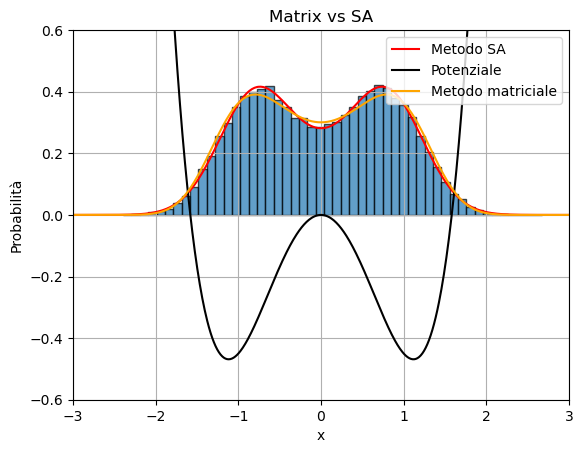

In [34]:
best_mu, best_sigma = get_best_parameters('OUTPUT/sa_data.dat')
print(best_mu, best_sigma)
plot_best_analitic_distribution(best_mu, best_sigma)
plot_best_distribution('OUTPUT/best_parameters_samples.dat')
plot_matrix_method()
set_apperance()

### Energia media in funzione del passo SA

Inizialmente si osservano forti oscillazioni che vanno poi a ridursi e stabilizzarsi intorno al valore di riferimento. Ciò è coerente con il processo di "raffreddamento": inizialmente la probabilità di accettazione è alta perchè è alta la temperatura e dunque sono possibili anche grandi salti di parametri e di energia. Col diminuire della temperatura la probabilità diminuisce e i salti bruschi diventano sempre più improbabili.

### Traiettoria nello spazio dei parametri della funzione test
Per mostrare il processo di esplorazione dello spazio dei parametri non ho esagerato con il numero di passi SA. Si può notare come l'esplorazione dello spazio dei parametri si addensi intorno a dei minimi locali, riuscendo poi a scappare da buche di energia poco profonde per poi cadere nel minimo globale dove è presente la soluzione di riferimento.


### Confronto soluzioni
C'è essenzialmente un perfetto accordo tra la soluzione analitica con parametri ottenuti da $SA$, la soluzione campionata dalle $x$  con l'algoritmo di Metropolis e la soluzione matriciale dell'equazione di Schrodinger. Ciò conferma la consistenza dei metodi $MC$ e del simulated annealing.


### Commenti finali
Nel processo di ottimizzazione tramite simulated annealing, è fondamentale mantenere una percentuale di accettazione intorno al 50% per il passo di Metropolis in modo da esplorare al meglio lo spazio. Con un'accettazione troppo bassa infatti il sistema accetta raramente nuove configurazioni rischiando di rimanere intrappolato in minimi locali, rendendo l’ottimizzazione inefficace.

E' importante anche bilanciare i parametri del $SA$ per trovare una soluzione ottimale. Salti troppo piccoli nei nuovi valori di $\mu$ e $\sigma$ rischiano di intrappolare il processo in minimi locali e non arrivare mai a convergenza, mentre salti troppo grandi rischiano di evitare buoni parametri. Un numero troppo basso di blocchi $SA$ compromette un'efficiente esplorazione dello spazio delle fasi trascurando possibili parametri ottimali. 

Infine, anche un raffreddamento troppo brusco compromette la convergenza verso soluzioni ottimali. Un decremento troppo rapido della temperatura non lascia al sistema il tempo sufficiente per esplorare efficacemente lo spazio delle fasi, causando il rischio di rimanere intrappolati in minimi locali.
È quindi fondamentale adottare un raffreddamento graduale, che consenta al sistema di adattarsi lentamente e di migliorare progressivamente la soluzione.